# Optimization (+AD + WTE)

In [1]:
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import brightway2 as bw2
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import datetime
import os
import platform
from IPython.display import Image

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option("precision", 2)

### SwolfPy version used to produced the results:

In [2]:
pd.DataFrame({'Version': [sp.__version__, sppm.__version__, spid.__version__]},
             index=['swolfpy', 'swolfpy_processmodels', 'swolfpy_inputdata'])

,Version
swolfpy,0.2.4
swolfpy_processmodels,0.1.9
swolfpy_inputdata,0.2.4


### System info

In [3]:
pd.DataFrame({'info': [platform.platform(),
                       platform.processor(),
                       os.cpu_count()]},
             index=['Platform', 'Processor', 'CPU_count'])

,info
Platform,Windows-10-10.0.19041-SP0
Processor,"Intel64 Family 6 Model 158 Stepping 9, GenuineIntel"
CPU_count,8


## Setup

In [4]:
iter_mehtod = 'LHS' 
n_iter = 100
n_proc = os.cpu_count()

summary = f"""
********  Config *********
Time: {datetime.datetime.now().strftime("%Y-%m-%d & %H:%M:%S")}
Initial guess generation: {iter_mehtod}
N iter: {n_iter}
N proc: {n_proc}\n
"""
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()

## Create project

In [5]:
project_name = 'Optimization'
technosphere = sp.Technosphere(project_name)
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

In [6]:
# Treatment processes
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}


In [7]:
# Distance
Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'SF', 'MF', 'COM']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=30)

distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,SF,MF,COM
LF,NaN,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
Composting,NaN,NaN,30.0,30.0,30.0,30.0,30.0,30.0,30.0
AD,NaN,NaN,NaN,30.0,30.0,30.0,30.0,30.0,30.0
WTE,NaN,NaN,NaN,NaN,30.0,30.0,30.0,30.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,30.0,30.0,30.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0,30.0
SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0
MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Collection_processes:
Collection_processes = {}


SF_scheme = sppm.SF_Col.scheme()
SF_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
SF_scheme[('RWC', 'N/A', 'N/A')] = 0.5
Collection_processes['SF'] = {'input_type': [],
                              'model': sppm.SF_Col('SF', SF_scheme,
                              Treatment_processes=Treatment_processes,
                              Distance=distance)}

MF_scheme = sppm.MF_Col.scheme()
MF_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
MF_scheme[('RWC', 'N/A', 'N/A')] = 0.5
Collection_processes['MF'] = {'input_type': [],
                              'model': sppm.MF_Col('MF', MF_scheme,
                              Treatment_processes=Treatment_processes,
                              Distance=distance)}

COM_scheme = sppm.COM_Col.scheme()
COM_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
COM_scheme[('RWC', 'N/A', 'N/A')] = 0.5
Collection_processes['COM'] = {'input_type': [],
                               'model': sppm.COM_Col('COM', COM_scheme,
                               Treatment_processes=Treatment_processes,
                               Distance=distance)}


In [9]:
start = time()
demo = sp.Project(project_name, common_data, Treatment_processes, distance, Collection_processes, technosphere)
demo.init_project()
demo.write_project()
demo.group_exchanges()
print("Time for writing the project: {} second".format(round(time()-start)))

Biosphere database already present!!! No setup is needed
Vacuuming database 
Vacuuming database 
Vacuuming database 


Writing activities to SQLite3 database:



                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:58:46
  Finished: 12/19/2021 17:59:01
  Total time elapsed: 00:00:15
  CPU %: 41.40
  Memory %: 1.35


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:02
  Finished: 12/19/2021 17:59:02
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.36

              ####
              ++++++ Initializing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:02
  Finished: 12/19/2021 17:59:02
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36

              ####
              ++++++ Initializing the AD
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:02
  Finished: 12/19/2021 17:59:02
  Total time elapsed: 00:00:00
  CPU %: 208.30
  Memory %: 1.36

              ####
              ++++++ Initializing the WTE
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:02
  Finished: 12/19/2021 17:59:02
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36

              ####
              ++++++ Initializing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:02
  Finished: 12/19/2021 17:59:02
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.36

              ####
              ++++++ Initializing the Reprocessing
              


Writing activities to SQLite3 database:
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:02
  Finished: 12/19/2021 17:59:02
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36

              ####
              ++++++ Initializing the SF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:03
  Finished: 12/19/2021 17:59:03
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36

              ####
              ++++++ Initializing the MF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:03
  Finished: 12/19/2021 17:59:03
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36

              ####
              ++++++ Initializing the COM
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:03
  Finished: 12/19/2021 17:59:03
  Total time elapsed: 00:00:00
  CPU %: 151.20
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:03
  Finished: 12/19/2021 17:59:04
  Total time elapsed: 00:00:01
  CPU %: 35.30
  Memory %: 1.37


Writing activities to SQLite3 database:



                  ####
                  ++++++ Writing the Composting_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:04
  Finished: 12/19/2021 17:59:05
  Total time elapsed: 00:00:00
  CPU %: 99.70
  Memory %: 1.39

              ####
              ++++++ Writing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:05
  Finished: 12/19/2021 17:59:05
  Total time elapsed: 00:00:00
  CPU %: 61.60
  Memory %: 1.39

                  ####
                  ++++++ Writing the AD_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:05
  Finished: 12/19/2021 17:59:05
  Total time elapsed: 00:00:00
  CPU %: 100.80
  Memory %: 1.39

              ####
              ++++++ Writing the AD
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:05
  Finished: 12/19/2021 17:59:06
  Total time elapsed: 00:00:00
  CPU %: 46.50
  Memory %: 1.39

                  ####
                  ++++++ Writing the WTE_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:06
  Finished: 12/19/2021 17:59:06
  Total time elapsed: 00:00:00
  CPU %: 43.00
  Memory %: 1.40


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the WTE
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:07
  Finished: 12/19/2021 17:59:07
  Total time elapsed: 00:00:00
  CPU %: 31.60
  Memory %: 1.41

                  ####
                  ++++++ Writing the SS_MRF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:07
  Finished: 12/19/2021 17:59:08
  Total time elapsed: 00:00:00
  CPU %: 47.30
  Memory %: 1.42


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:08
  Finished: 12/19/2021 17:59:09
  Total time elapsed: 00:00:00
  CPU %: 90.10
  Memory %: 1.43


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:09
  Finished: 12/19/2021 17:59:09
  Total time elapsed: 00:00:00
  CPU %: 60.10
  Memory %: 1.43

                  ####
                  ++++++ Writing the SF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:09
  Finished: 12/19/2021 17:59:09
  Total time elapsed: 00:00:00
  CPU %: 57.10
  Memory %: 1.44


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:10
  Finished: 12/19/2021 17:59:10
  Total time elapsed: 00:00:00
  CPU %: 71.00
  Memory %: 1.44

                  ####
                  ++++++ Writing the MF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:11
  Finished: 12/19/2021 17:59:11
  Total time elapsed: 00:00:00
  CPU %: 70.10
  Memory %: 1.45


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the MF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:12
  Finished: 12/19/2021 17:59:12
  Total time elapsed: 00:00:00
  CPU %: 60.10
  Memory %: 1.45

                  ####
                  ++++++ Writing the COM_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:12
  Finished: 12/19/2021 17:59:12
  Total time elapsed: 00:00:00
  CPU %: 83.10
  Memory %: 1.46


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the COM
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/19/2021 17:59:13
  Finished: 12/19/2021 17:59:13
  Total time elapsed: 00:00:00
  CPU %: 57.30
  Memory %: 1.47

                  Grouping the exchanges with parameters in Database LF
                  

                  Grouping the exchanges with parameters in Database Composting
                  

                  Grouping the exchanges with parameters in Database AD
                  

                  Grouping the exchanges with parameters in Database WTE
                  

                  Grouping the exchanges with parameters in Database SS_MRF
                  

                  Grouping the exchanges with parameters in Database Reprocessing
                  

                  Grouping the exchanges with parameters in Database SF
                  

                  Grouping the exchanges with parameters in Database MF
                  

                  Grouping the exchanges with parameters in Databas

In [10]:
start = time()
demo.update_parameters(demo.parameters.default_parameters_list())
print("Time for updating the parameters: {} second".format(round(time()-start)))

Time for updating the parameters: 17 second


In [11]:
input_dict = {'SF':{}, 'MF':{}, 'COM':{}}

for key in common_data.Index:
    input_dict['SF'][key] = 1
    input_dict['MF'][key] = 1
    input_dict['COM'][key] = 1

demo.create_scenario(input_dict, 'Collection')

## Mass flows, impacts and costs based on default parameters

In [12]:
results = pd.DataFrame(columns=['Value', 'Unit'],
                       index=['Diversion', 'GWP', 'Operation Cost', 'Capital cost', 'Total cost',
                              'SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing'])

bw2.projects.set_current('Optimization')
Demand = {('waste', 'Collection'):1}
FU=bw2.get_activity(('waste', 'Collection'))
method = ('IPCC 2013', 'climate change', 'GWP 100a')
lca=bw2.LCA(Demand,method)
lca.lci()
lca.lcia()
results.loc['GWP',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), 'kg CO2/Mg']

lca.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Operation Cost',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']


lca.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Capital cost',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']

lca.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Total cost',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']

for process in ['SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing']:
    results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(lca, process)), 'Mg/yr']

results.loc['Diversion',:] = [(1 - results['Value']['LF'] / float(FU.as_dict()['unit'].split(' ')[0])) * 100, '%']
results

,Value,Unit
Diversion,50.94,%
GWP,-341.37,kg CO2/Mg
Operation Cost,14.08,$/Mg
Capital cost,18.98,$/Mg
Total cost,33.06,$/Mg
SF,74826,Mg/yr
MF,74826,Mg/yr
COM,87511,Mg/yr
LF,116347,Mg/yr
WTE,99404,Mg/yr


In [13]:
demo.parameters_list

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_SF_to_LF', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_SF_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_SF_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_SF_to_AD', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_SF_to_LF', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_SF_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_MF_to_LF', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_MF_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_MF_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_MF_to_AD', 'amount': 0.5},
 {'nam

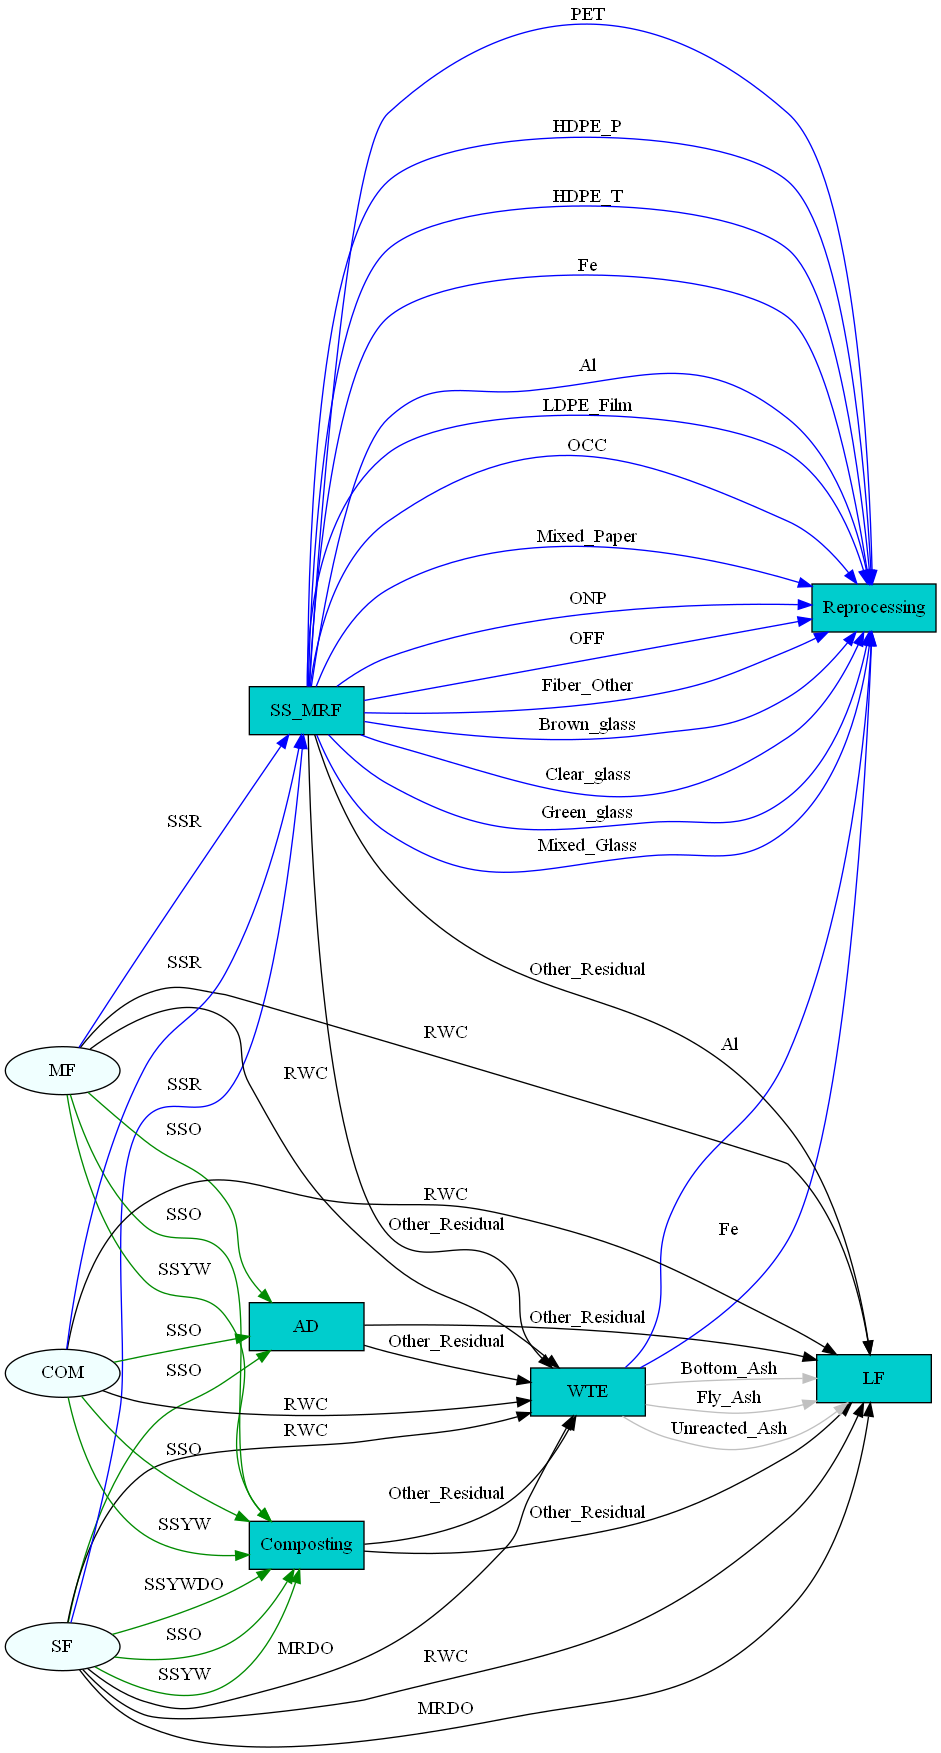

In [14]:
demo.parameters.SWM_network(show_vals=False, all_flow=False, filename='SWM_network_optimization')
Image(filename='SWM_network_optimization.gv.png', width=300)

In [15]:
# Functions used in reporting the optimization results
def Iterations_Performance(OptObject, FileName):
    objectives = []
    times = []
    for res in OptObject.all_results:
        if res:
            if res.success:
                objectives.append(res.fun * 10**OptObject.magnitude)
                times.append(res.time)
            else:
                objectives.append(None)
                times.append(res.time)
        else:
            objectives.append(None)
            times.append(None)

    DF = pd.DataFrame({'Objective': objectives, 'Time': times})
    DF['Ratio'] = DF['Objective'].fillna(0)/DF['Objective'].fillna(0).min()
    DF.to_csv(FileName)

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(15,9), sharex=True)

    DF['Objective'].plot(kind='bar', ax=ax1, color='b')
    ax1.set_ylabel(Opt.method[0][-1])

    DF['Ratio'].plot(kind='bar', ax=ax2, color='r')
    ax2.set_ylabel('Ratio to minimum')

    DF['Time'].plot(kind='bar', ax=ax3, color='g')
    ax3.set_ylabel("Time (sec)")
    ax3.set_xlabel('Iteration')
    
    if len(list(DF.index)) > 20:
        ax3.set_xticks(list(DF.index[::5]))
        ax3.set_xticklabels(list(DF.index)[::5])
    
    return DF

def report_res(Opt, FU, fileName):
    results = pd.DataFrame(columns=['Value', 'Unit'],
                           index=['Diversion', 'GWP', 'Operation Cost', 'Capital cost', 'Total cost',
                                  'SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing'])
    Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
    Opt.lcia()
    results.loc['GWP',:] = [Opt.score/float(FU.as_dict()['unit'].split(' ')[0]), 'kg CO2/Mg']

    Opt.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Operation Cost',:] = [Opt.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']


    Opt.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Capital cost',:] = [Opt.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']

    Opt.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Total cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    for process in ['SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing']:
        results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(Opt, process)), 'Mg/yr']

    results.loc['Diversion',:] = [(1 - results['Value']['LF'] / float(FU.as_dict()['unit'].split(' ')[0]))*100, '%']
    results.to_csv(fileName)
    return(results)

# Optimization: With_WTE

In [16]:
scenario_name = 'With_WTE'
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')], demo)
config=Opt.config(demo)
config.iloc[6:, [1, 3, 5]] = 'Fix'
Opt.set_config(config)
config

,SF,SF mode,MF,MF mode,COM,COM mode
"(RWC, N/A, N/A)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, N/A, SSR)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, SSR)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, SSO, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSO, SSR)",0,Optimize,0,Optimize,0,Optimize
"(REC_WetRes, N/A, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSYW, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSO, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(ORG_DryRes, ORG_DryRes, N/A)",0,Fix,0,Fix,0,Fix


In [17]:
constraints = {}
start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, nproc=n_proc, timeout=1000, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_2 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -131757952.1762379
                      Global min: -131757952.1762379 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -131757952.17610468
                      Global min: -131757952.1762379 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -131757952.17632511
                      Global min: -131757952.17632511 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -131757952.17616074
                      Global min: -1317579

### Performance of iterations

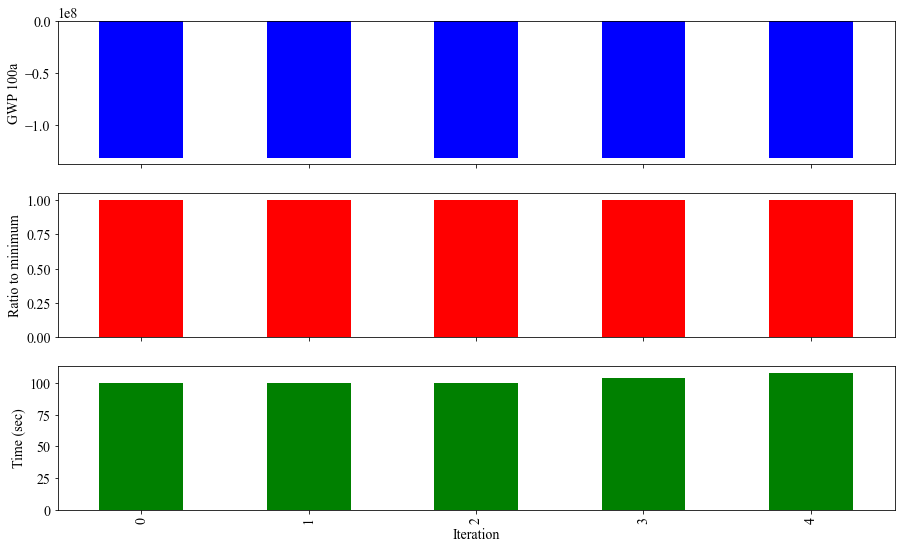

In [18]:
DF = Iterations_Performance(Opt, f'{scenario_name}_Iterations.csv')

## Mass flows, impacts and costs

In [19]:
report_res(Opt, FU, f'{scenario_name}.csv')

,Value,Unit
Diversion,87.3,%
GWP,-555.56,kg CO2/Mg
Operation Cost,-16.65,$/Mg
Capital cost,34.61,$/Mg
Total cost,17.96,$/Mg
SF,74826,Mg/yr
MF,74826,Mg/yr
COM,87511,Mg/yr
LF,30130,Mg/yr
WTE,181673,Mg/yr


In [20]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName=f'{scenario_name}.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'SF', 'MF', 'COM']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 7, 7, 8, 8]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 3, 1, 2, 0, 3, 1, 2, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1, 4, 1, 4, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'RWC', 'RWC', 'SSO', 'SSO', 'RWC', 'RWC', 'SSO', 'SSO', 'Bottom_Ash', 'Fly_Ash', 'Unreacted_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO', 'SSR', 'SSYW', 'SSR', 'SSYW']
              value = [0.0

In [21]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.443},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.557},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.5027},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.4973},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_SF_to_LF', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_SF_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_SF_to_Composting', 'amount': 0.297},
 {'name': 'frac_of_SSO_from_SF_to_AD', 'amount': 0.703},
 {'name': 'frac_of_MRDO_from_SF_to_LF', 'amount': 0.4899},
 {'name': 'frac_of_MRDO_from_SF_to_WTE', 'amount': 0.5101},
 {'name': 'frac_of_RWC_from_MF_to_LF', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_MF_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_MF_to_Composting', 'amount': 0.6802},
 {'name': 'frac_of_SSO_from_MF_to_AD',

In [22]:
summary = f"""\n
********  {scenario_name} - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'SF': [20, 21, 22, 23, 24, 25], 'MF': [26, 27, 28, 29, 30, 31], 'COM': [32, 33, 34, 35, 36, 37]} 




********  With_WTE - Summary *********
Number of decision variables: 38
Number of constraints: 13
Total time: 0:01:55
Average time per iteration: 0:01:42
Successful iterations: 5
Number of best iterations: 5
Number of >95 iterations: 5


